# Graphs in Algorithms

A **graph** is a data structure consisting of a set of vertices (nodes) and edges (connections between nodes). Graphs are widely used in various fields such as computer science, transportation networks, and social media.

**Types of Graphs:**
1. **Undirected Graph**: The edges have no direction.
2. **Directed Graph (Digraph)**: The edges have a direction.
3. **Weighted Graph**: Each edge has a weight associated with it.

In this tutorial, we will explore graph representations and basic graph traversal algorithms, such as Depth First Search (DFS) and Breadth First Search (BFS).





## Graph Representation

### Using Adjacency Matrix
using adjacency matrix
![title](../images/1/weighted_directed_graph.png)
### Using Adjacency List
using adjacency lists

![adjacency list](../images/1/adjacency_list_graph.png) ![


In [13]:
def create_adj_matrix(n, edges, is_directed=False):
    adj_matrix = [ [0 for i in range(n)] for j in range(n)]
    for u, v, *r in edges:
        w = 1 if len(r)==0 else r[0]    
        adj_matrix[u][v] = w
        if not is_directed:
            adj_matrix[v][u] = w  # Undirected graph
    return adj_matrix


In [14]:
# Number of nodes
n = 5

# Create your own edges
edges = [(0, 1), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (3, 4)]

# Generate the matrix interactively
adj_matrix = create_adj_matrix(n, edges)

In [51]:
%reload_ext autoreload


In [ ]:
# add image in markdown


In [15]:
class GraphM:
    def __init__(self, edges, is_directed=False, vertices = None):
        self.edges = GraphM._validate_edges(edges)
        self.vertices = list(vertices) if vertices else GraphM._extract_vertices(edges)
        self.n = len(self.vertices)
        self.is_directed= is_directed

        # Create an adjacency matrix initialized with zeros
        self.adj_matrix = [[0] * self.n for _ in range(self.n)]

        # Add edges
        for edge in self.edges:
            vertex1, vertex2, weight = edge
            self.add_edge(vertex1, vertex2, weight)
    
    def _validate_edges(edges):
        result = []
        for u, v, *r in edges:
            w = r[0] if len(r) > 0 else 1
            edge = (u, v, w)
            result.append(edge)
        return result
    
    def _extract_vertices(edges):
        s = set()
        for u, v, *r in edges:
            s.add(u)
            s.add(v)
        return list(s)


    def add_edge(self, vertex1, vertex2, weight):
        i = self.vertices.index(vertex1)
        j = self.vertices.index(vertex2)
        self.adj_matrix[i][j] = weight
        if not self.is_directed:
          self.adj_matrix[j][i] = weight 

    def __repr__(self):
        result = f'\t   {"  ".join(self.vertices)}'
        for i, row in enumerate(self.adj_matrix):
            result+= f'\n\t{self.vertices[i]} {row}'
        return result + '\n'
    
    def __str__(self):
        return self.__repr__()

In [16]:
edges = [("A", "B",4), ("D", "A", 5), ("B", "D", 1), ("B", "C", 2), ("E", "D", 10), ("C", "E", 8)]
gm = GraphM(edges, is_directed=False)    
print(gm)

	   A  D  B  E  C
	A [0, 5, 4, 0, 0]
	D [5, 0, 1, 10, 0]
	B [4, 1, 0, 0, 2]
	E [0, 10, 0, 0, 8]
	C [0, 0, 2, 8, 0]



In [79]:
import matplotlib.pyplot as plt
import networkx as nx

def display_graph_plot(graph):
    G = nx.DiGraph() if graph.is_directed else nx.Graph()

    # Add nodes and edges
    for i, vertex in enumerate(graph.vertices):
        G.add_node(vertex)
    
    for i, row in enumerate(graph.adj_matrix):
        for j, weight in enumerate(row):
            if weight != 0:
                G.add_edge(graph.vertices[i], graph.vertices[j], weight=weight)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()


In [57]:

import ncdtecbook.it.graph as ncd
ncd.__dir__()

['__name__',
 '__loader__',
 '__spec__',
 '__package__',
 '__file__',
 '__cached__',
 '__builtins__',
 'plt',
 'nx',
 'display_graph5',
 'p']

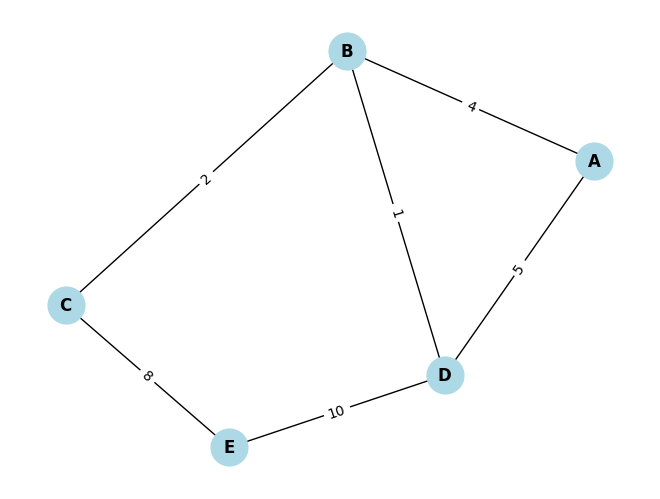

In [100]:
display_graph_plot(gm)